In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/Solar Power Plant Data.csv")

# Convert 'Date-Hour(NMT)' to datetime and extract features
df["Date-Hour(NMT)"] = pd.to_datetime(df["Date-Hour(NMT)"], format="%d.%m.%Y-%H:%M")
df["Hour"] = df["Date-Hour(NMT)"].dt.hour
df["Day"] = df["Date-Hour(NMT)"].dt.day
df["Month"] = df["Date-Hour(NMT)"].dt.month
df["Year"] = df["Date-Hour(NMT)"].dt.year
df.drop(columns=["Date-Hour(NMT)"], inplace=True)

In [3]:
# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Missing values check
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WindSpeed            8760 non-null   float64
 1   Sunshine             8760 non-null   int64  
 2   AirPressure          8760 non-null   float64
 3   Radiation            8760 non-null   float64
 4   AirTemperature       8760 non-null   float64
 5   RelativeAirHumidity  8760 non-null   int64  
 6   SystemProduction     8760 non-null   float64
 7   Hour                 8760 non-null   int32  
 8   Day                  8760 non-null   int32  
 9   Month                8760 non-null   int32  
 10  Year                 8760 non-null   int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 616.1 KB
None

Statistical Summary:
         WindSpeed     Sunshine  AirPressure    Radiation  AirTemperature  \
count  8760.000000  8760.000000  8760.000000  8760.000000     8

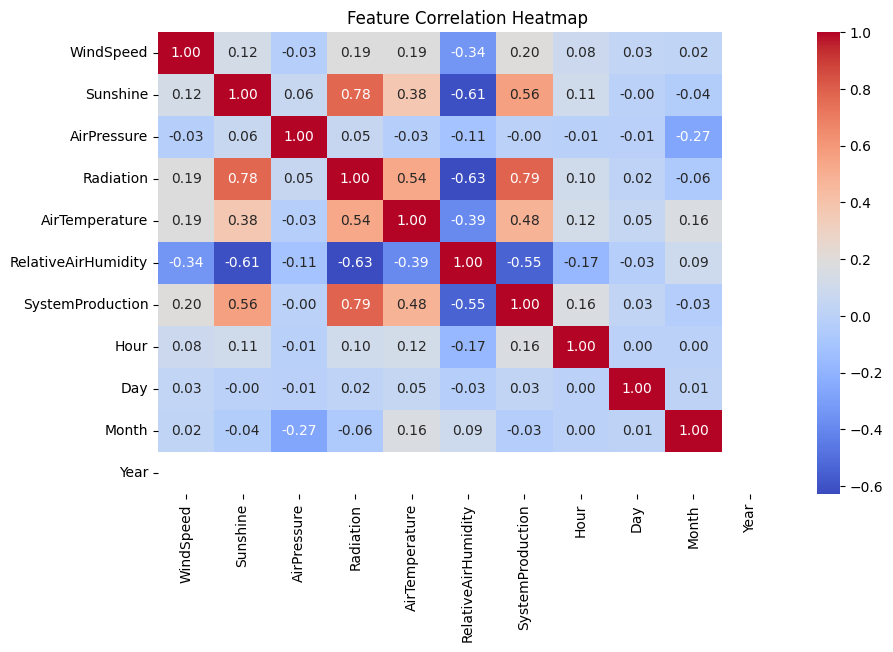

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

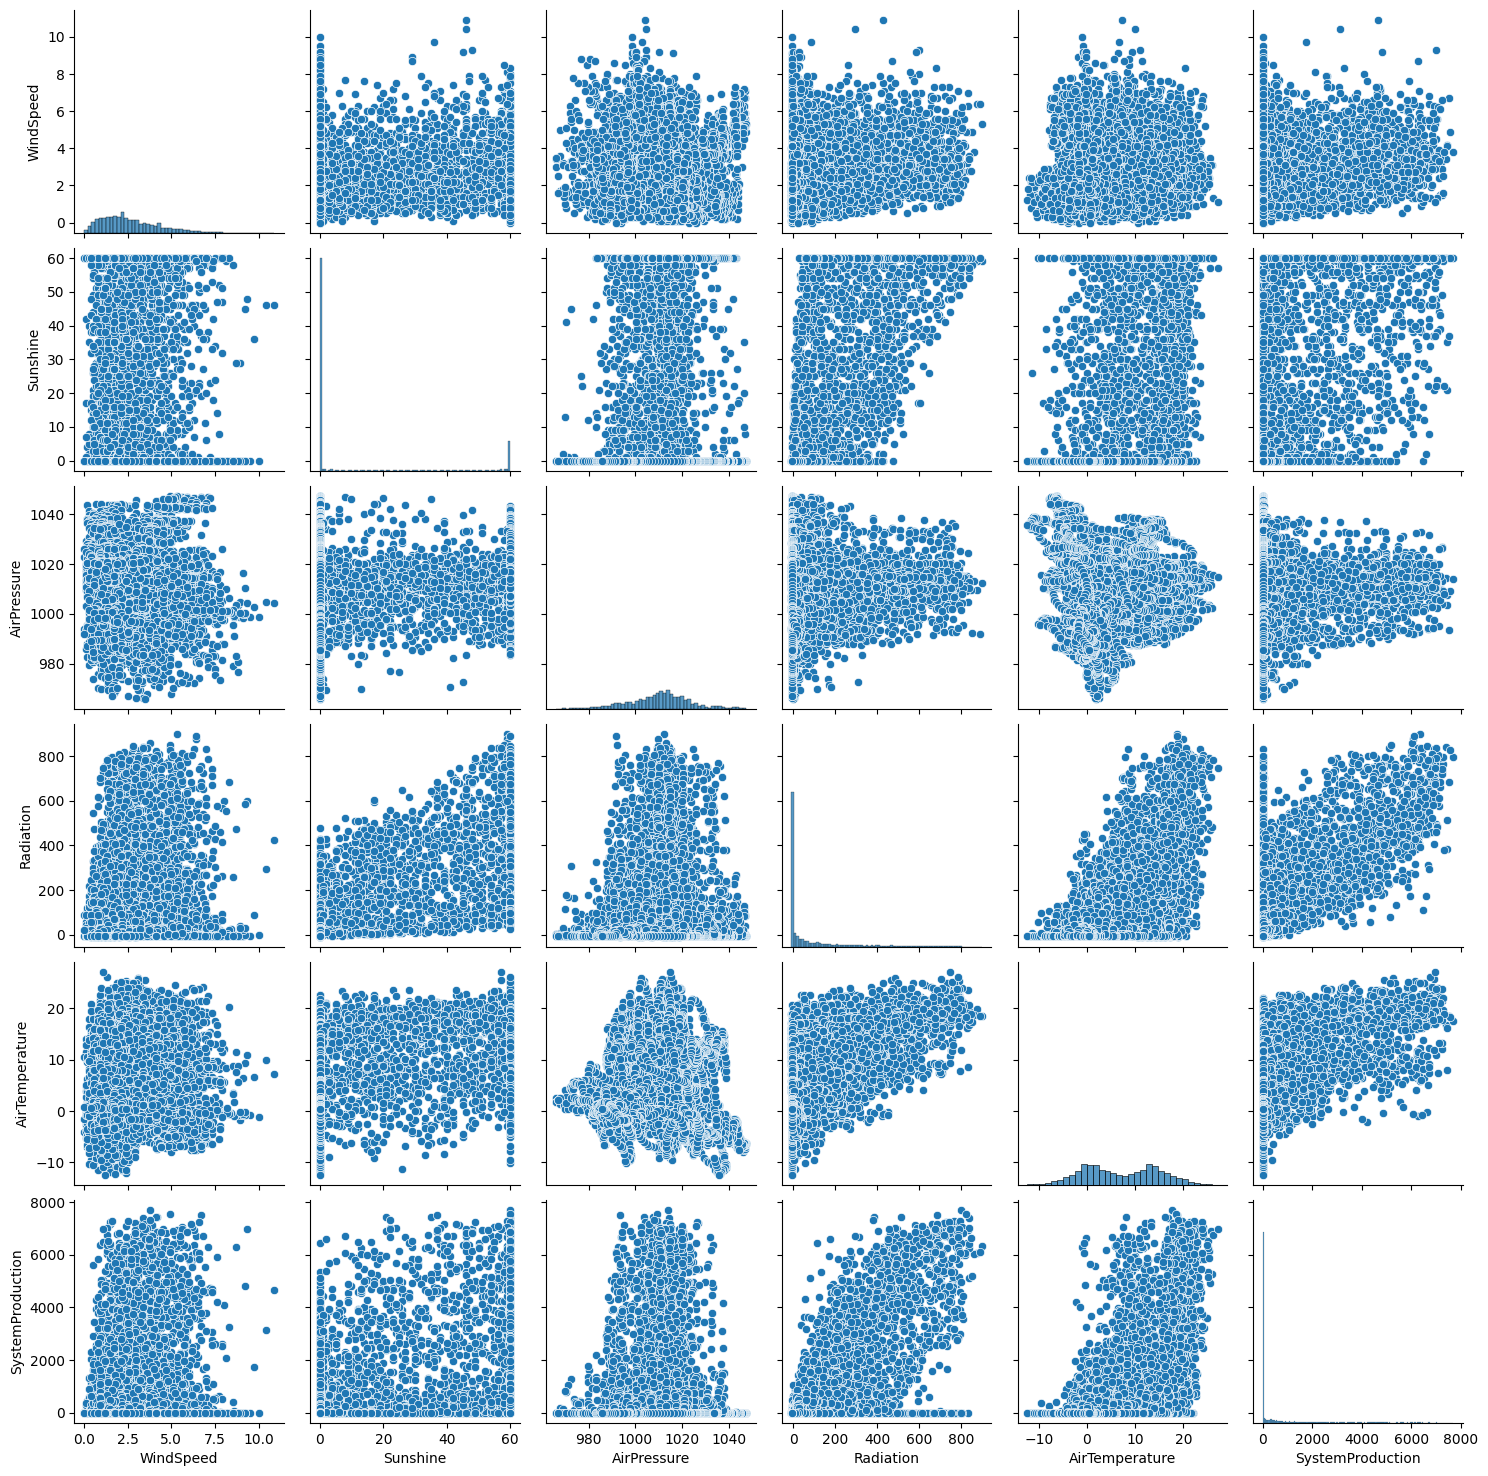

In [5]:
sns.pairplot(df, vars=["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "SystemProduction"])
plt.show()

In [6]:

# Define features and target
X = df.drop(columns=["SystemProduction"])
y = df["SystemProduction"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

# Save model and scaler
joblib.dump(model, "energy_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


MAE: 202.7080185163206
MSE: 212866.5205847235
R² Score: 0.8924075476774422
Model and scaler saved successfully!
